In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 250
import seaborn as sns
sns.set_theme(style='darkgrid',palette='rainbow')
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy.cluster import hierarchy
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')
from yellowbrick.cluster import SilhouetteVisualizer

In [3]:
wine = pd.read_csv('./wine.csv')
wine = wine.iloc[:,1:]
wine

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


# Data PreProcessing

In [4]:
wine.describe().T

,count,mean,std,min,25%,50%,75%,max
Alcohol,178.0,13.000618,0.811827,11.03,12.3625,13.050,13.6775,14.83
Malic,178.0,2.336348,1.117146,0.74,1.6025,1.865,3.0825,5.80
Ash,178.0,2.366517,0.274344,1.36,2.2100,2.360,2.5575,3.23
Alcalinity,178.0,19.494944,3.339564,10.60,17.2000,19.500,21.5000,30.00
Magnesium,178.0,99.741573,14.282484,70.00,88.0000,98.000,107.0000,162.00
Phenols,178.0,2.295112,0.625851,0.98,1.7425,2.355,2.8000,3.88
Flavanoids,178.0,2.029270,0.998859,0.34,1.2050,2.135,2.8750,5.08
Nonflavanoids,178.0,0.361854,0.124453,0.13,0.2700,0.340,0.4375,0.66
Proanthocyanins,178.0,1.590899,0.572359,0.41,1.2500,1.555,1.9500,3.58
Color,178.0,5.058090,2.318286,1.28,3.2200,4.690,6.2000,13.00


In [5]:
sc = StandardScaler()
scaled = sc.fit_transform(wine)

# PCA

In [6]:
pca = PCA()
pd.DataFrame(pca.fit_transform(scaled))

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,3.316751,-1.443463,-0.165739,-0.215631,0.693043,-0.223880,0.596427,0.065139,0.641443,1.020956,-0.451563,0.540810,-0.066239
1,2.209465,0.333393,-2.026457,-0.291358,-0.257655,-0.927120,0.053776,1.024416,-0.308847,0.159701,-0.142657,0.388238,0.003637
2,2.516740,-1.031151,0.982819,0.724902,-0.251033,0.549276,0.424205,-0.344216,-1.177834,0.113361,-0.286673,0.000584,0.021717
3,3.757066,-2.756372,-0.176192,0.567983,-0.311842,0.114431,-0.383337,0.643593,0.052544,0.239413,0.759584,-0.242020,-0.369484
4,1.008908,-0.869831,2.026688,-0.409766,0.298458,-0.406520,0.444074,0.416700,0.326819,-0.078366,-0.525945,-0.216664,-0.079364
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,-3.370524,-2.216289,-0.342570,1.058527,-0.574164,-1.108788,0.958416,-0.146097,-0.022498,-0.304117,0.139228,0.170786,-0.114427
174,-2.601956,-1.757229,0.207581,0.349496,0.255063,-0.026465,0.146894,-0.552427,-0.097969,-0.206061,0.258198,-0.279431,-0.187371
175,-2.677839,-2.760899,-0.940942,0.312035,1.271355,0.273068,0.679235,0.047024,0.001222,-0.247997,0.512492,0.698766,0.072078
176,-2.387017,-2.297347,-0.550696,-0.688285,0.813955,1.178783,0.633975,0.390829,0.057448,0.491490,0.299822,0.339821,-0.021866


In [7]:
pca.explained_variance_ratio_

array([0.36198848, 0.1920749 , 0.11123631, 0.0706903 , 0.06563294,
       0.04935823, 0.04238679, 0.02680749, 0.02222153, 0.01930019,
       0.01736836, 0.01298233, 0.00795215])

In [8]:
np.cumsum(pca.explained_variance_ratio_)

array([0.36198848, 0.55406338, 0.66529969, 0.73598999, 0.80162293,
       0.85098116, 0.89336795, 0.92017544, 0.94239698, 0.96169717,
       0.97906553, 0.99204785, 1.        ])

Text(0.5, 1.0, 'Scree Plot')

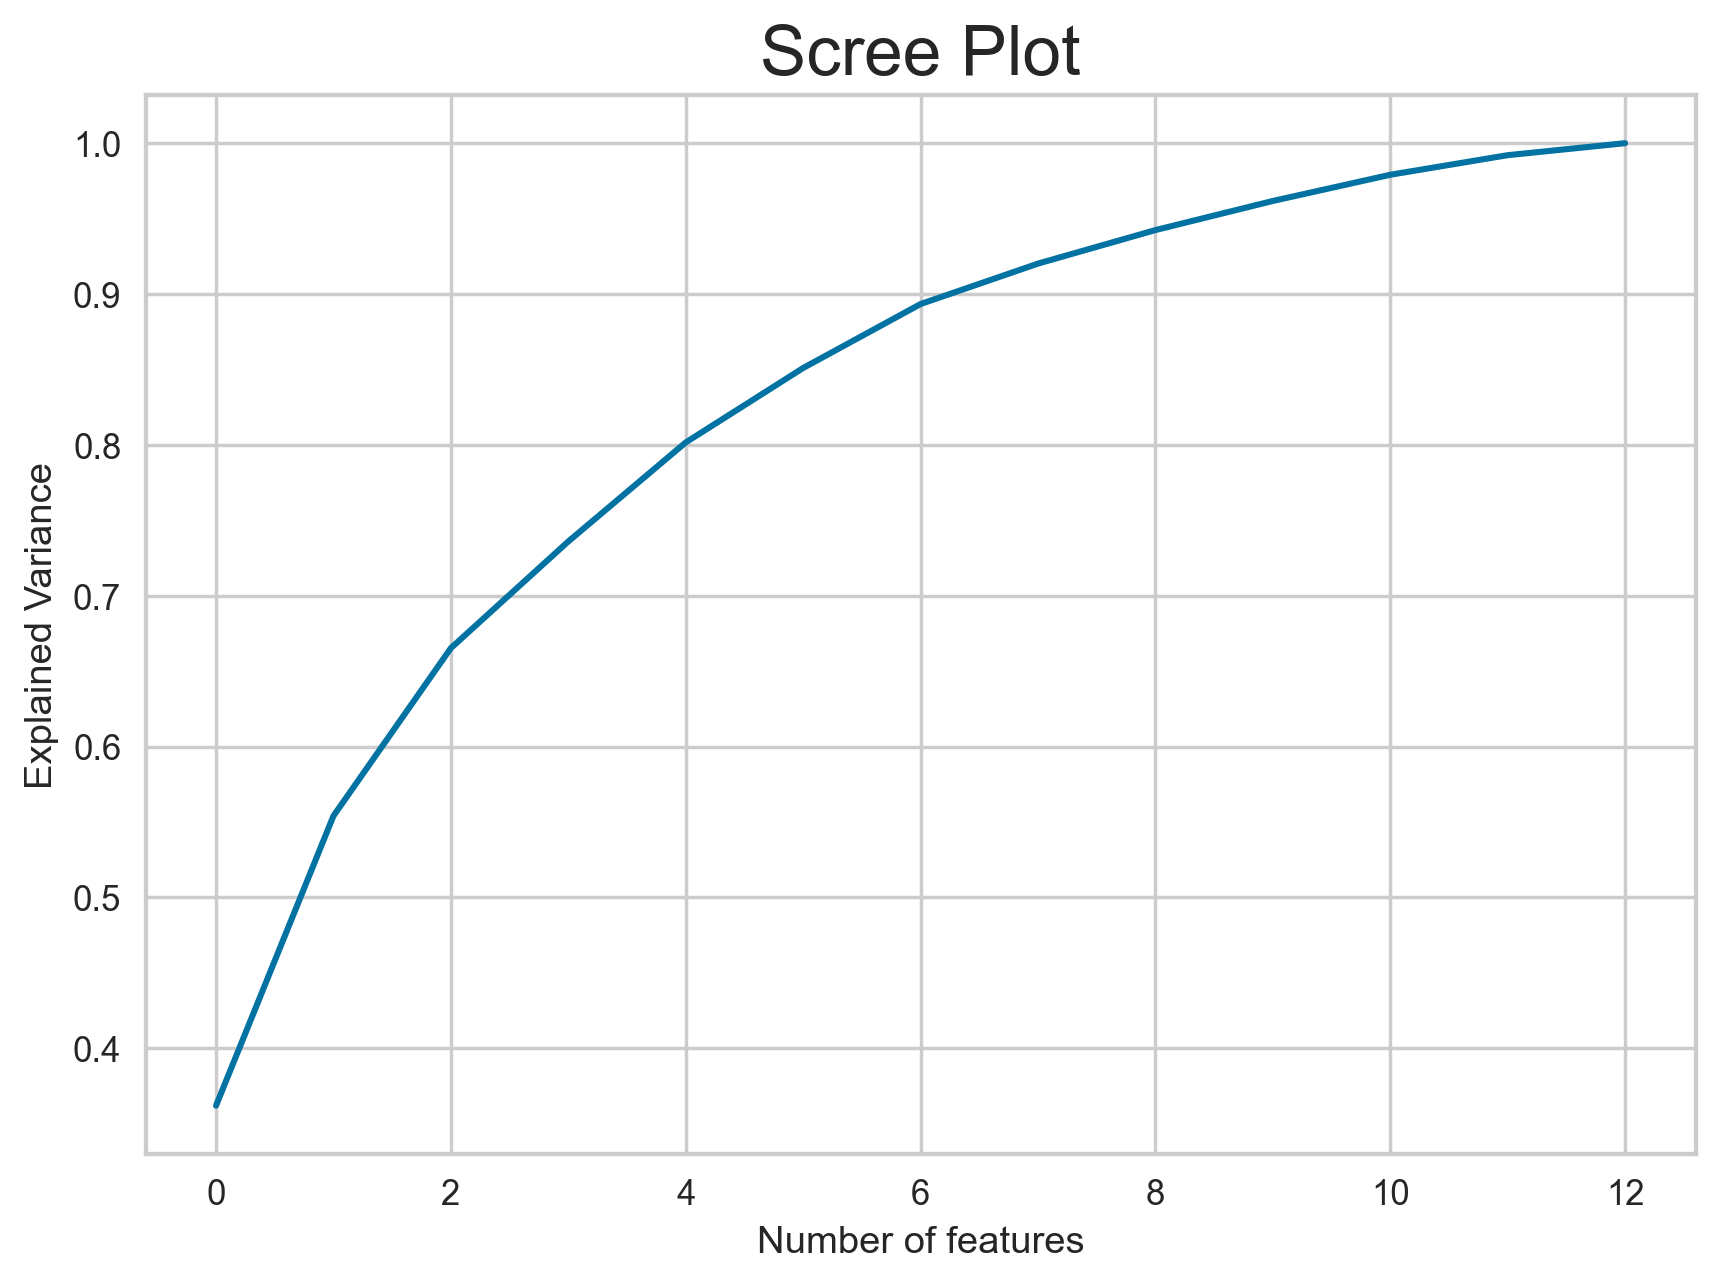

In [9]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of features')
plt.ylabel('Explained Variance')
plt.title('Scree Plot', size = 20)

<h2 style="color:red; font-family: Arial;">Since problem statement specifically asked us to use first 3 components</h2>

In [10]:
pca = PCA(n_components=3)
pcs = pca.fit_transform(scaled)
pcs = pd.DataFrame(pcs, columns=['pc1','pc2','pc3'])
pcs

,pc1,pc2,pc3
0,3.316751,-1.443463,-0.165739
1,2.209465,0.333393,-2.026457
2,2.516740,-1.031151,0.982819
3,3.757066,-2.756372,-0.176192
4,1.008908,-0.869831,2.026688
...,...,...,...
173,-3.370524,-2.216289,-0.342570
174,-2.601956,-1.757229,0.207581
175,-2.677839,-2.760899,-0.940942
176,-2.387017,-2.297347,-0.550696


# Clustering

<h2 style="color:red; font-family: Arial;">1. Hierarchical Clustering</h2>

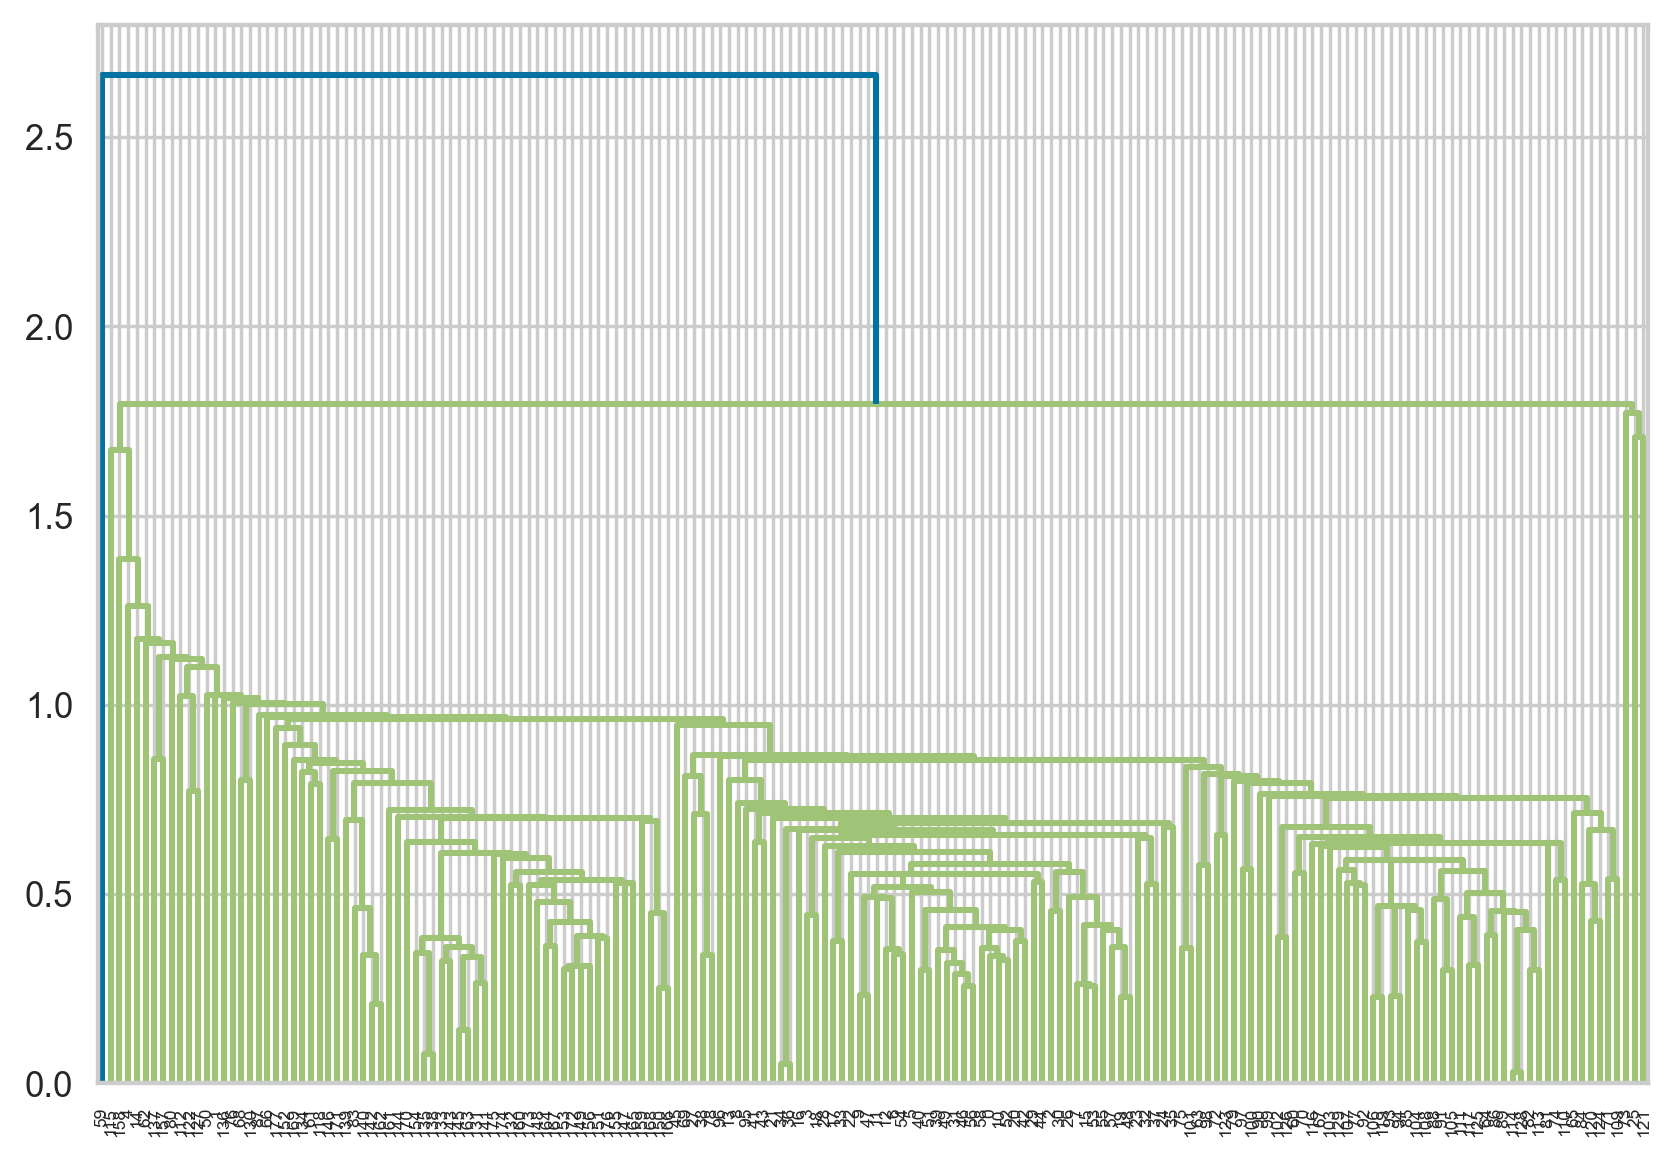

In [11]:
lk = hierarchy.linkage(pcs,method='single')
plt.axhline(2.9,linestyle='--',c='r')
dendo = hierarchy.dendrogram(lk)

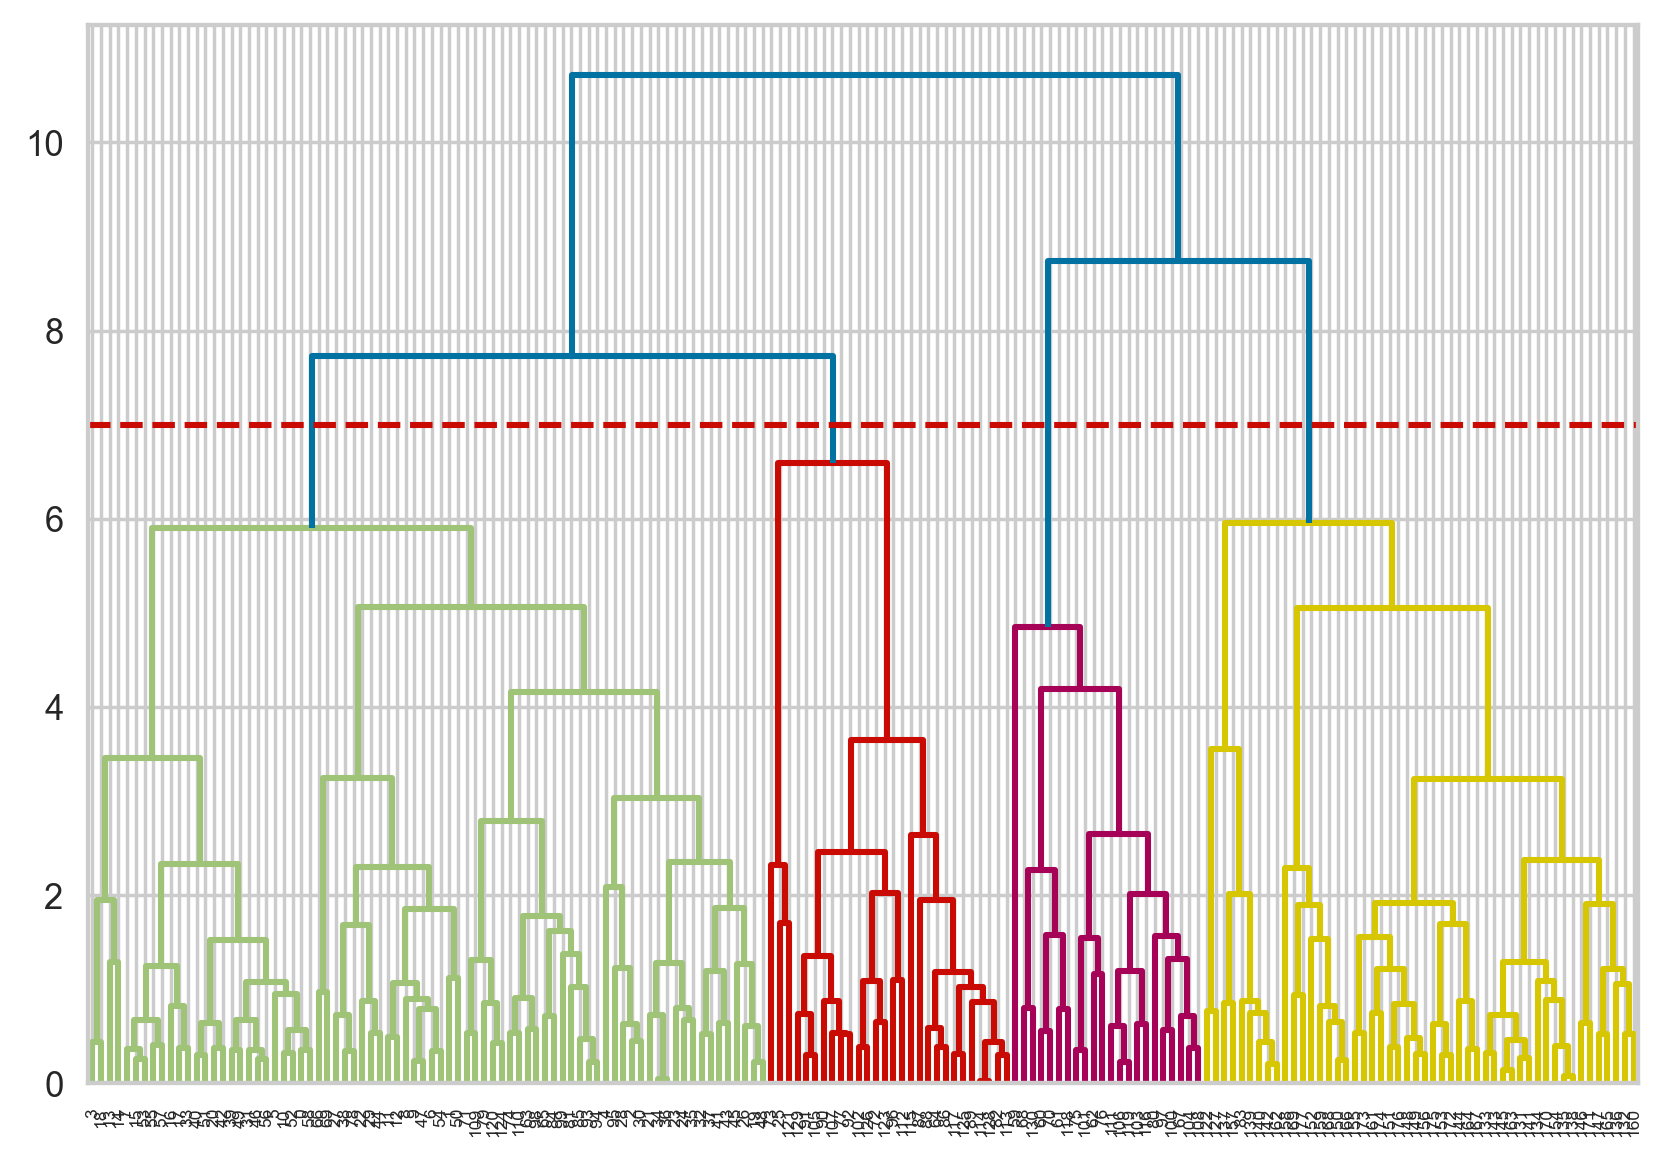

In [12]:
lk_c = hierarchy.linkage(pcs,method='complete')
dendo = hierarchy.dendrogram(lk_c)
plt.axhline(7,linestyle='--',c='r')
plt.show()

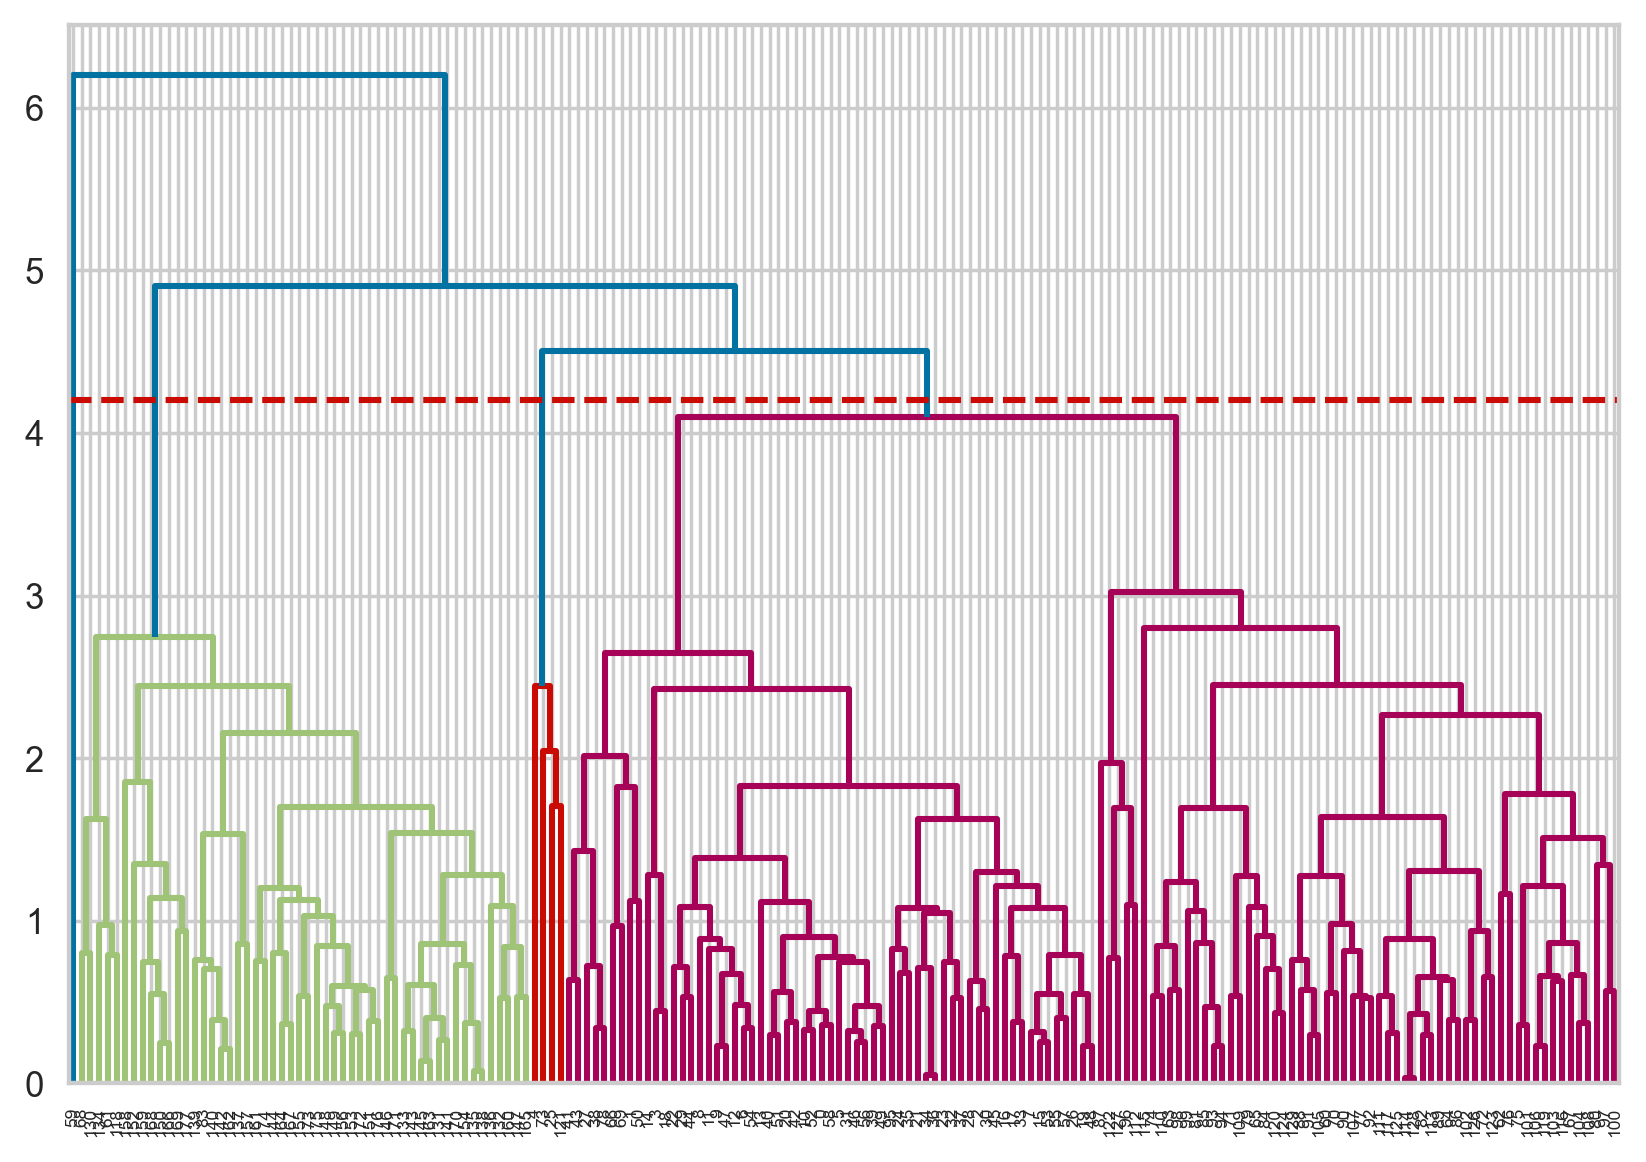

In [13]:
lk_avg = hierarchy.linkage(pcs,method='average')
dendo = hierarchy.dendrogram(lk_avg)
plt.axhline(4.2,linestyle='--',c='r')
plt.show()

<h3 style="color:blue; font-family: Arial;"> conclusion:</h3>

<h3 style="color:black; font-family: Arial;"> Ideal Number of Clusters as infered from the above methods is n_cluster = 4 using complete method</h3>

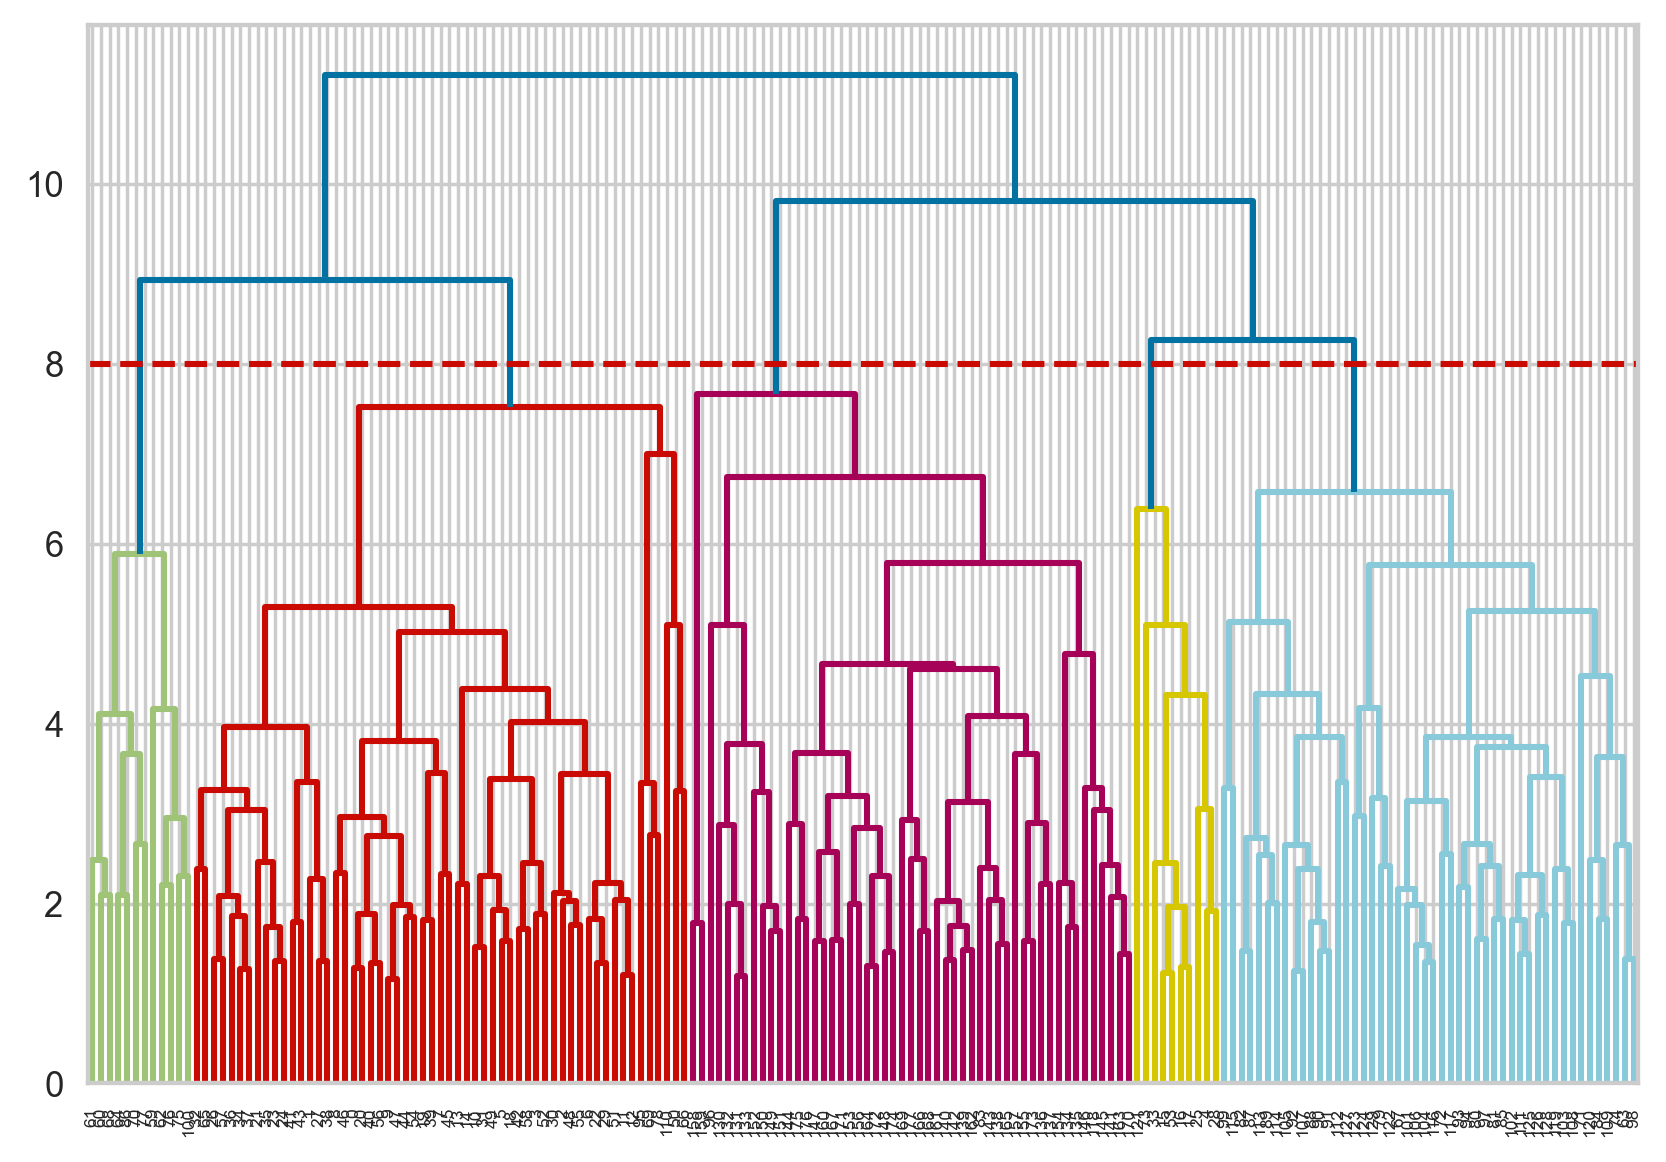

In [15]:
# on original data
lk_cg = hierarchy.linkage(scaled,method='complete')
dendo = hierarchy.dendrogram(lk_cg)
plt.axhline(8,linestyle='--',c='r')
plt.show()

<h3 style="color:blue; font-family: Arial;"> conclusion:</h3>

<h3 style="color:black; font-family: Arial;"> For original data we get 5 cluster but on pca data we get 4 cluster</h3>

# Model

In [16]:
# on pcs data
hc = AgglomerativeClustering(n_clusters=4)
y = hc.fit_predict(pcs)

In [17]:
silhouette_score(pcs,y)

0.38195690348144407

In [18]:
pcs['Cluster(H)'] = y

In [19]:
pcs.groupby('Cluster(H)').agg('mean',numeric_only=True)

,pc1,pc2,pc3
Cluster(H),,,
0,2.255555,-0.826594,-0.067071
1,-2.782034,-1.272012,-0.136247
2,-0.824478,1.802400,-0.840358
3,0.217686,1.655233,0.949557


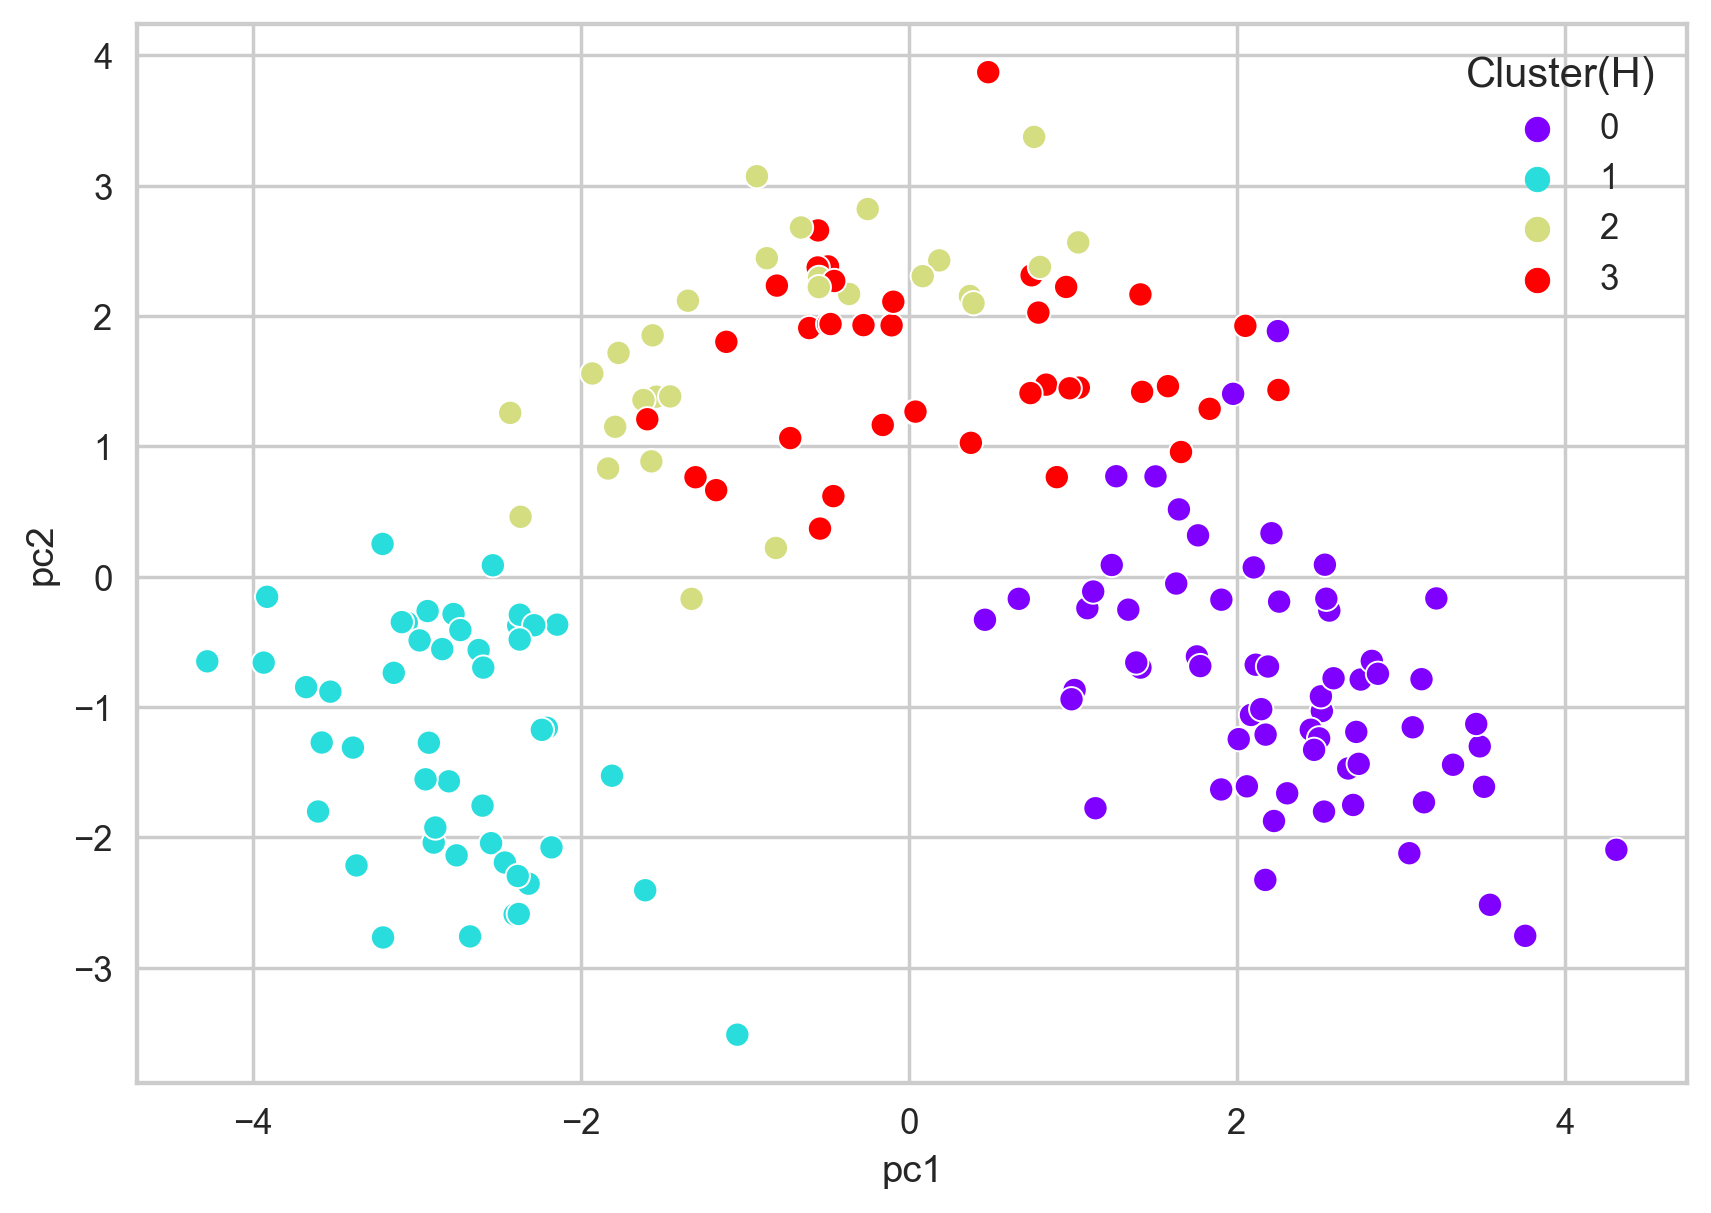

In [20]:
sns.scatterplot(x=pcs['pc1'],y= pcs['pc2'], hue = pcs['Cluster(H)'],palette='rainbow')
plt.show()

<h2 style="color:red; font-family: Arial;">2. Kmeans</h2>

In [21]:
km = KMeans()
y = km.fit_predict(pcs)

In [22]:
km.cluster_centers_ # since default num_cluster = 8 we get 8 centers

array([[-2.63388033e+00, -2.12160741e+00,  2.27615552e-01,
         1.00000000e+00],
       [-6.46566546e-01,  1.93317830e+00, -1.11498017e+00,
         2.00000000e+00],
       [ 2.75460744e+00, -1.46980767e+00, -3.34633362e-01,
         2.22044605e-16],
       [-7.34396135e-01,  1.58770004e+00,  1.13267437e+00,
         2.84000000e+00],
       [-2.82646693e+00, -5.33627993e-01, -4.80891153e-01,
         1.07142857e+00],
       [ 1.20152158e+00,  1.82362002e+00,  5.44549017e-01,
         2.94117647e+00],
       [ 1.79971021e+00, -6.78478098e-01,  1.62018257e+00,
         2.22044605e-16],
       [ 1.80118829e+00,  1.05925514e-01, -9.62563543e-01,
         4.44089210e-16]])

<Axes: xlabel='pc1', ylabel='pc2'>

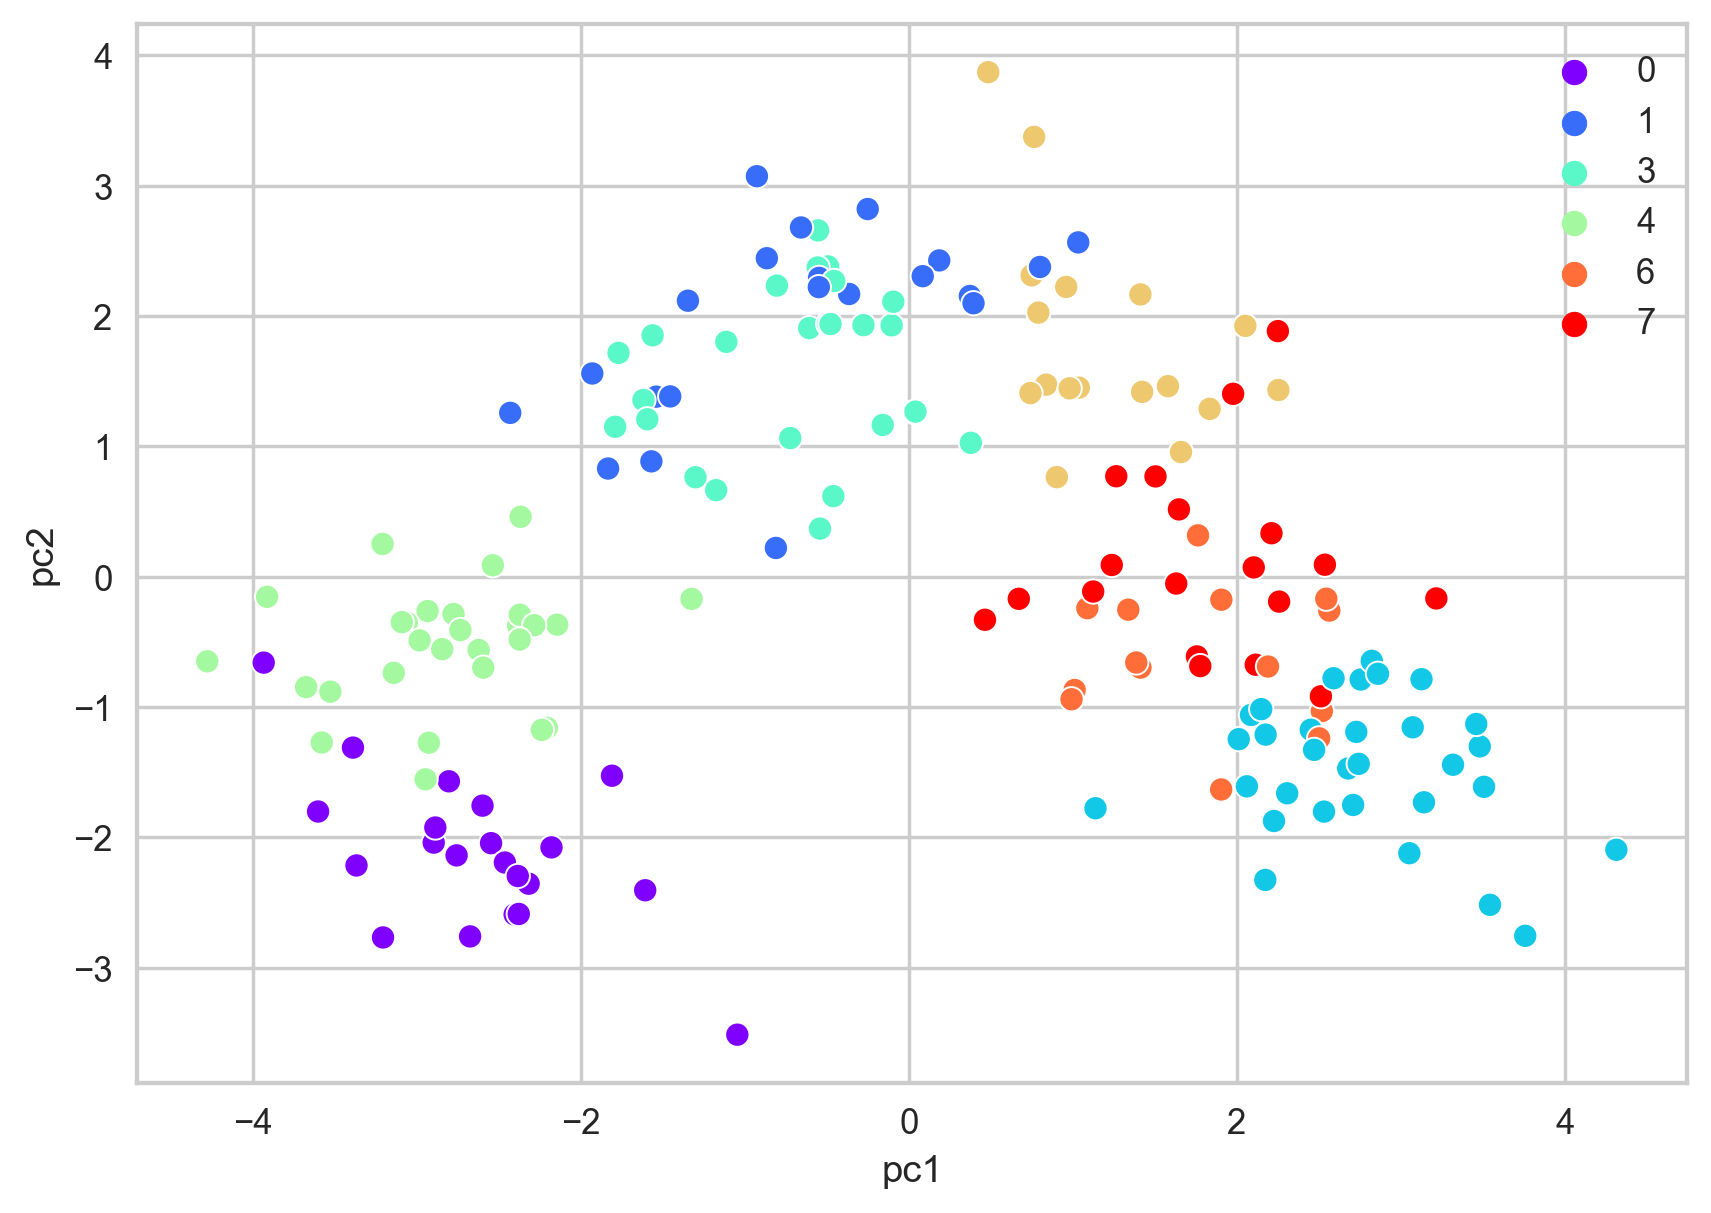

In [23]:
#Visualize the clusters
sns.scatterplot(x=pcs['pc1'],y=pcs['pc2'],hue = y, palette='rainbow')

In [24]:
# evaluate 
silhouette_score(pcs,y)

0.3067654488966254

Elbow graph for optimal n_cluster

In [25]:
# for pcs data
wcss = []

for i in range(1,20):
    km = KMeans(n_clusters=i)
    km.fit_predict(pcs)
    wcss.append(km.inertia_)

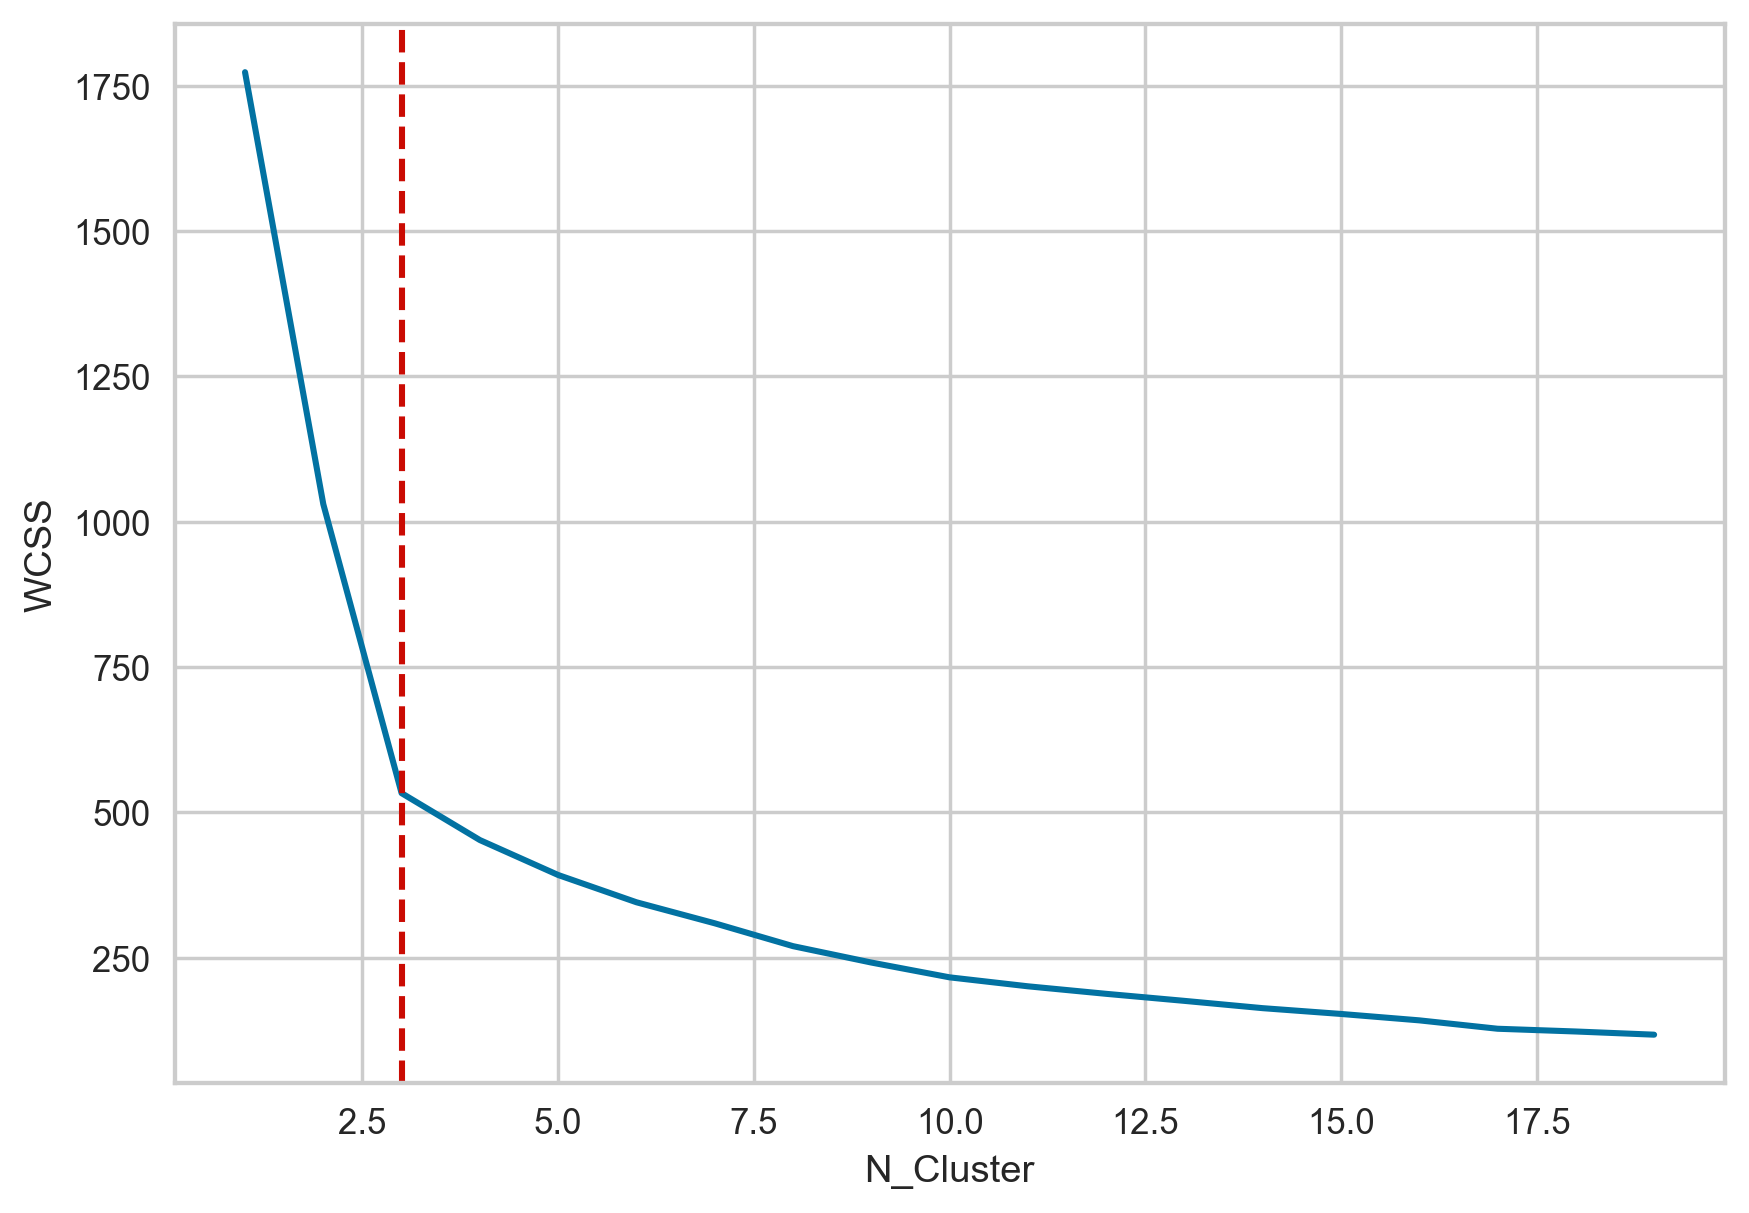

In [26]:
plt.plot(range(1,20),wcss)
plt.ylabel('WCSS')
plt.xlabel('N_Cluster')
plt.axvline(3,linestyle='--',c='r')
plt.show()

<h3 style="color:blue; font-family: Arial;"> conclusion:</h3>

<h3 style="color:black; font-family: Arial;"> Optimal number of cluster as infered from elbow graph is 3 for pcs data</h3>

# Final model

In [27]:
km = KMeans(n_clusters=3)
ypred = km.fit_predict(pcs)
ypred

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 1, 0, 0, 0, 0,
       2, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

<Axes: xlabel='pc1', ylabel='pc2'>

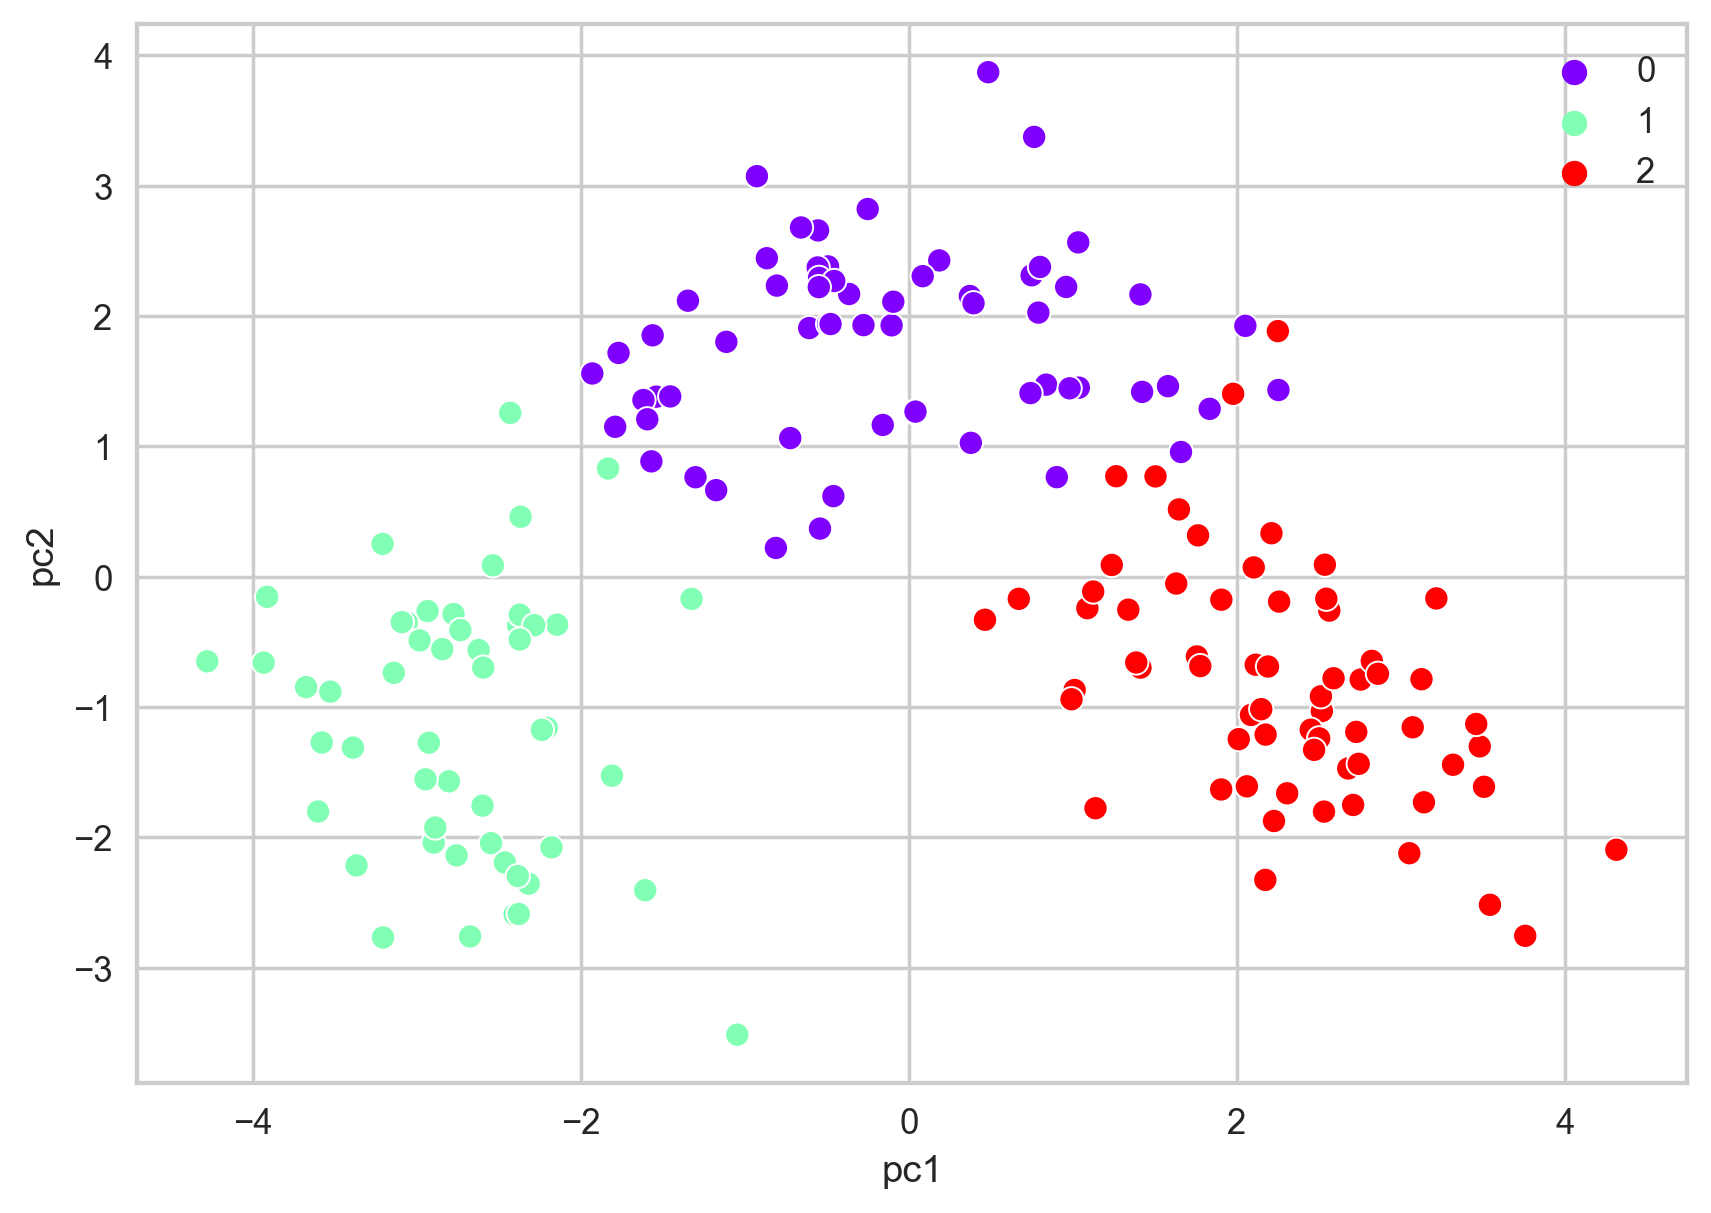

In [28]:
#Visualize the clusters
sns.scatterplot(x=pcs['pc1'],y=pcs['pc2'],hue = ypred, palette='rainbow')

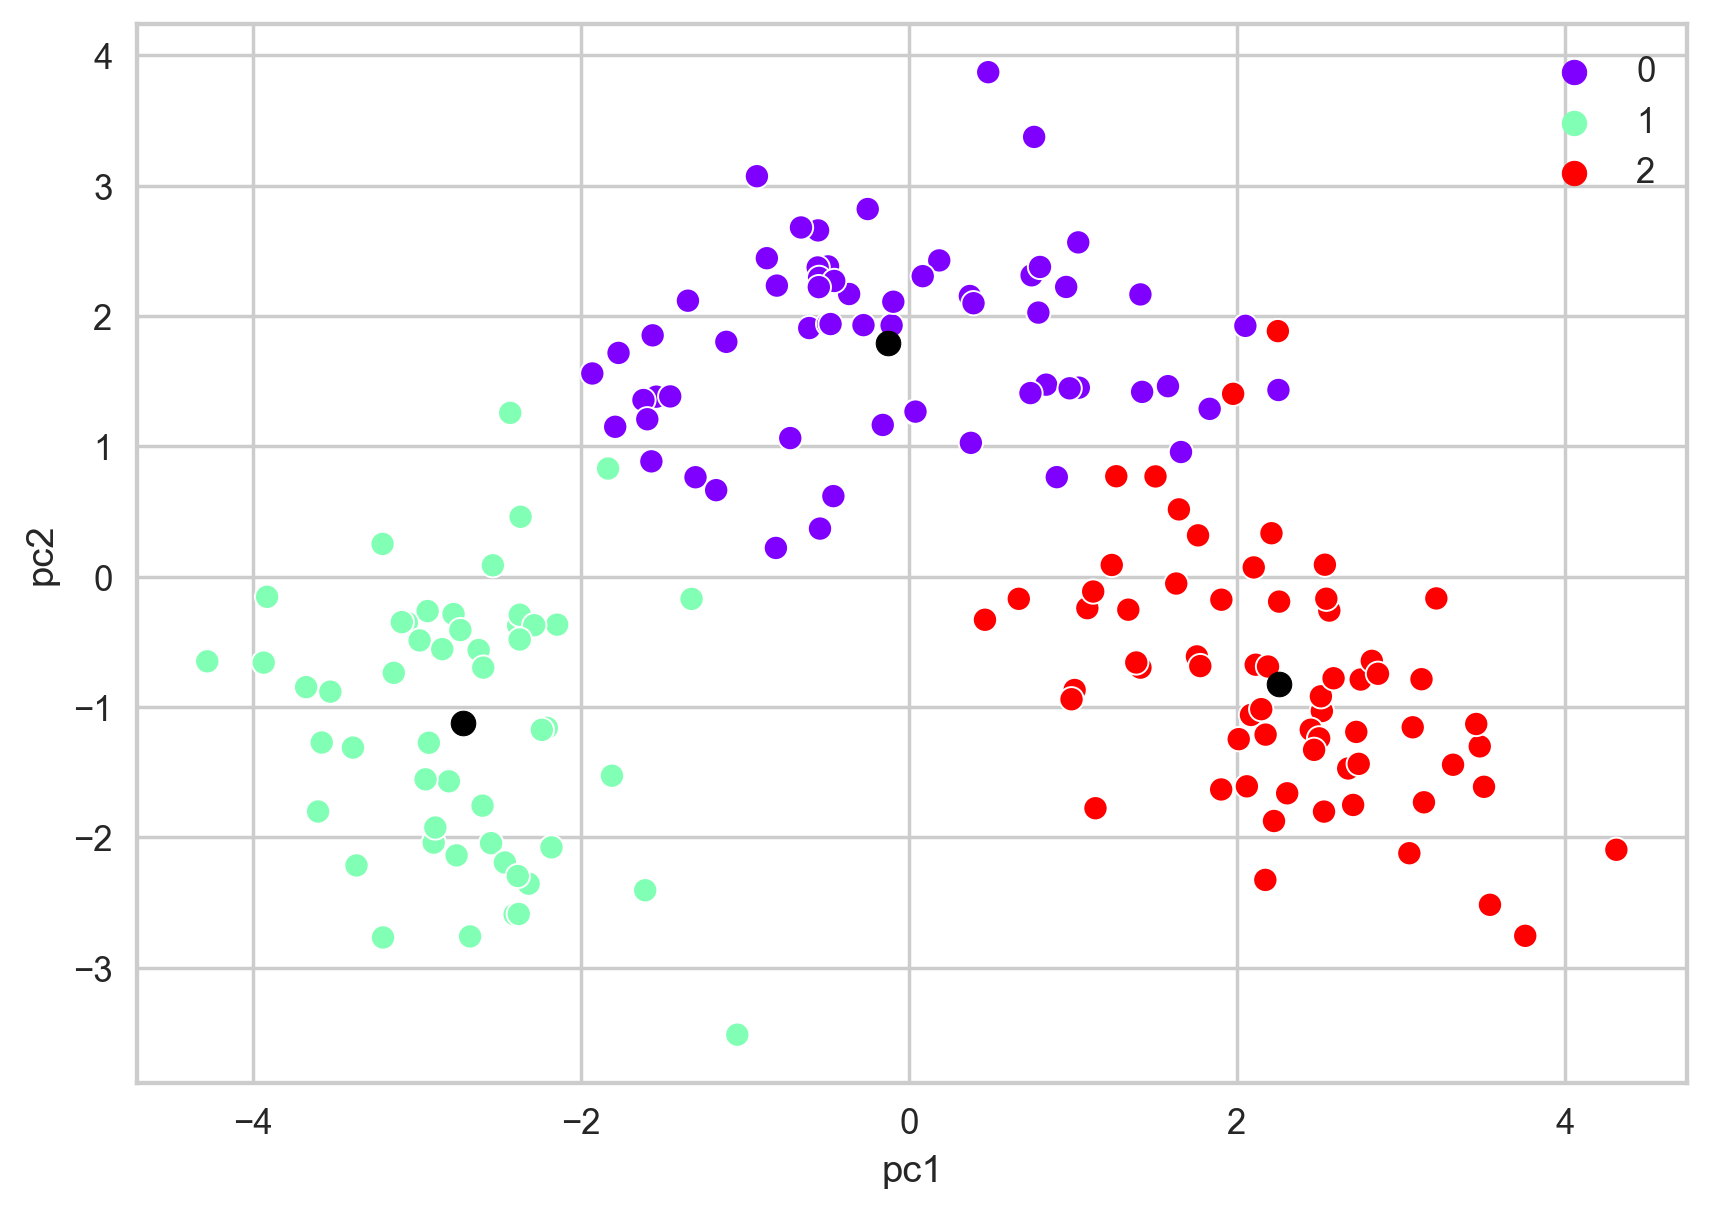

In [29]:
# Clusters with center
sns.scatterplot(x=pcs['pc1'],y=pcs['pc2'],hue = ypred, palette='rainbow')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color = 'black',s=50)

_<h3 style="color:black; font-family: Arial;"> Cluster Center in black</h3>_

In [31]:
#evaluation
silhouette_score(pcs,ypred)

0.5171184296041779

In [32]:
pcs['Cluster(kmean)'] = ypred

In [33]:

pcs.groupby('Cluster(kmean)')[['pc1','pc2','pc3']].agg('mean',numeric_only=True)

,pc1,pc2,pc3
Cluster(kmean),,,
0,-0.127246,1.792530,0.266990
1,-2.720036,-1.125651,-0.239093
2,2.255555,-0.826594,-0.067071


# Kmean silhouette score visualization

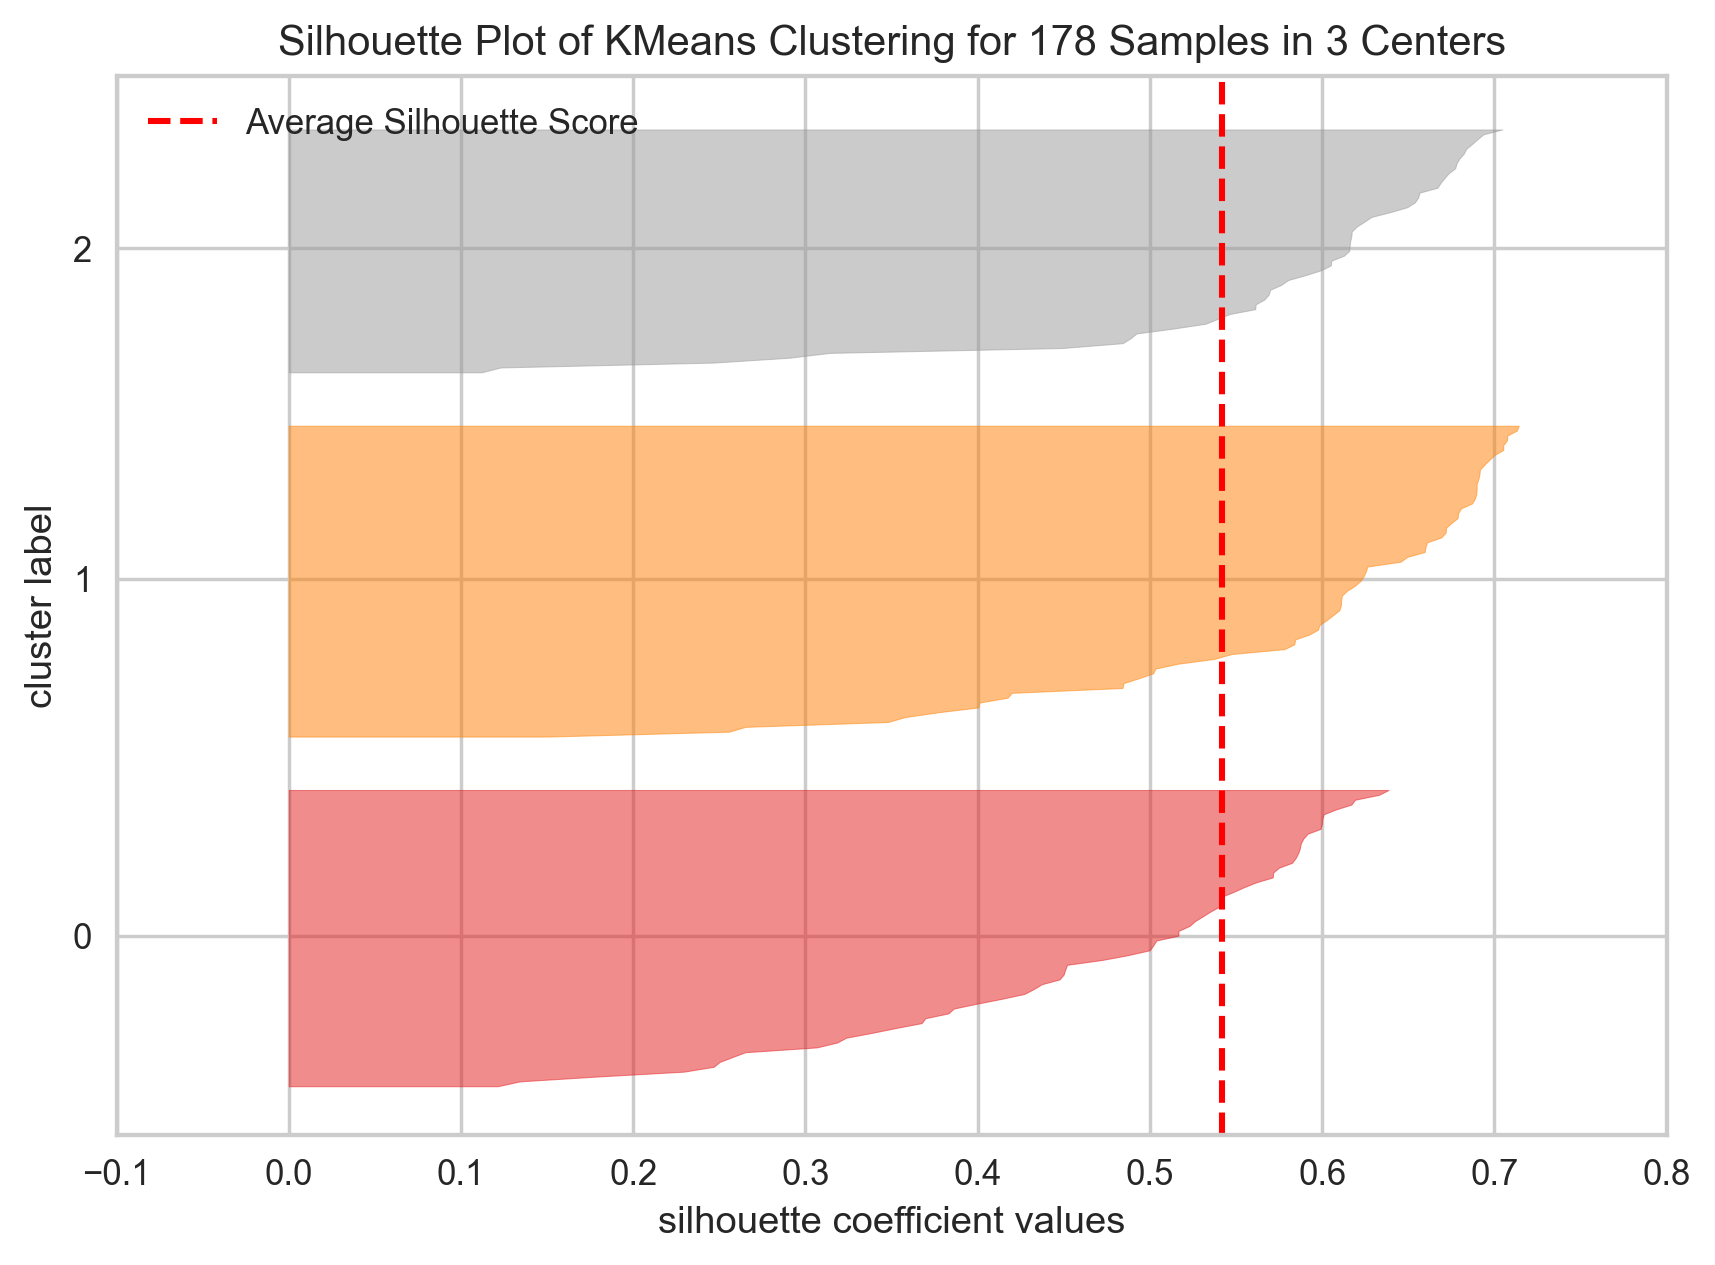

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 178 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [34]:
model = SilhouetteVisualizer(KMeans(n_clusters=3))
vis = model.fit(pcs)
vis.show()  